In [40]:
# on load les librairies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import itertools
import sys
import munkres
import seaborn as sn 


In [2]:
# on load les données (resultats des clusters obtenues grace à R (voir clustering.Rmd) et sauvegardé sous le nom "res.csv")
list_R  = np.array(pd.read_csv("res.csv")["x"])

In [4]:
# on construie le dictionnaire avec clefs=classes et values = le numéro des images appartenant à cette classe 
elements = os.listdir("../classes")
Mat = {}
for element in elements :
    new_mat = []
    dirs = os.listdir("../classes/"+element)
    for dir in dirs :
        if dir[-3 :] == "png" :
            try :
                new_mat.append(int(dir.replace(".png","")))
            except Exception as e :
                pass 
    Mat[int(element.replace("class_",""))] = new_mat


In [21]:
# on teste qu'il n'y a pas de classe supérieur à 18 ou inférieur à 0 ni d'élément non entier à l'intérieur du dictionnaire
keys = [element for element in Mat.keys()]
values = [element for element in Mat.values()]
try :
    assert np.max(keys) < 19
    assert np.min(keys) > 0
    sum = 0
    for key in keys :
        assert all(isinstance(x, int) for x in values[key-1])== True
        sum += len(values[key-1])
    assert sum == 779
except Exception as e :
    print("Test failed")
    raise e 
print("Test succesfull")

Test succesfull


On fait l'hypothèse (fausse) que la classe i correspond au clusters i 

In [24]:
#on crée la matrice des prédictions croisées 
nb_class = len(keys)
matrix= np.zeros((nb_class,nb_class))
for key, value in Mat.items():
    for num in value :
        matrix[key-1,list_R[num-1]-1] = matrix[key-1,list_R[num-1]-1] + 1
print(matrix)

[[ 1.  1. 12.  0.  2.  6.  2. 12.  3.  0.  0.  0.  0.  4.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  6. 13.  1. 14.  5.  0.  0.  1.  0.  0.  0.  2.  2.  2.]
 [ 6.  0.  3. 13. 12.  6. 11.  0.  0.  1.  0.  0.  6.  0.  0.  0.  0.  0.]
 [ 0.  4.  1.  0.  0.  3.  0. 15. 10.  3.  0.  0.  0.  0.  1.  4.  3.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  6.  2. 30. 17.  0.  0.  9.  2.  7.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  3. 15.  8.  0.  1.  0.  0.  2.  5. 21. 40.]
 [14.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.]
 [10.  1.  4. 22. 14.  0. 10.  1.  0.  0.  0.  0.  4.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  9.  1.  0.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 4.  0.  0.  0.  5.  2. 13.  5.  2.  2.  3.  3.  0.  0.  1.  2. 10.  9.]
 [25.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  0.  0.  3.  0.  0.  0.  0.]
 [ 7. 12. 88.  1. 25. 19.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  1.  0.

On va identifier classe et clusters identique en essayant de maximiser les individues identiques ce qui revient ici à permuter les lignes et les colonnes afin de maximiser la trace de la matrice 

In [27]:
def permute_columns(a, inds):
    p = np.zeros_like(a)
    for i in inds:
        p[i] = 1
    return np.dot(a, p)

In [48]:
def maximize_trace(a):
    assert a.shape[0] == a.shape[1]
    d = np.zeros_like(a)
    n = a.shape[0]
    b = np.eye(n, dtype=int)
    for i, j in itertools.product(range(0,n), range(0,n)):
        d[j, i] = np.sum((b[j, :]-a[i, :])**2)
    m = munkres.Munkres()
    inds = m.compute(d)
    return permute_columns(a, inds)

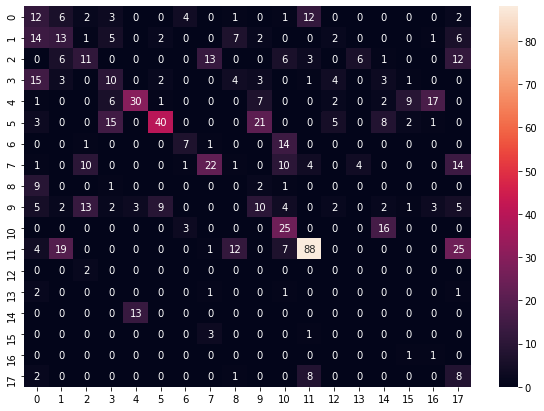

In [49]:
#on peut maintenant appliquer nos deux fonctions
new_m = maximize_trace(matrix)
plt.figure(figsize = (10,7))
sn.heatmap(new_m, annot=True)
plt.show()

In [54]:
# on calcule l'accuracy obtenue 
print("Accuracy = ",np.sum([new_m[i,i] for i in range(new_m.shape[0])])/sum)

Accuracy =  0.355584082156611
